In [1]:

import pandas as pd 
import numpy as np 

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

df = pd.read_csv('water_quality.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [4]:

df.shape

(2861, 11)

In [5]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [6]:

df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [7]:

df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [9]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [11]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [12]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [13]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [20]:

import matplotlib.pyplot as plt
from datetime import datetime

# Set style for visualizations
plt.style.use('ggplot')

# Load data
df = pd.read_csv('water_quality.csv', sep=';')

In [21]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Sort by station ID and date
df = df.sort_values(by=['id', 'date'])

# Handle missing values - forward fill within each monitoring station
df_clean = df.groupby('id').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

# Extract temporal features
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day
df_clean['day_of_week'] = df_clean['date'].dt.dayofweek
df_clean['quarter'] = df_clean['date'].dt.quarter

# Parameters to analyze
params = ['NH4', 'BSK5', 'O2', 'NO3', 'SO4', 'CL']

C:\Users\ssgir\AppData\Local\Temp\ipykernel_4188\1214989789.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df.groupby('id').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


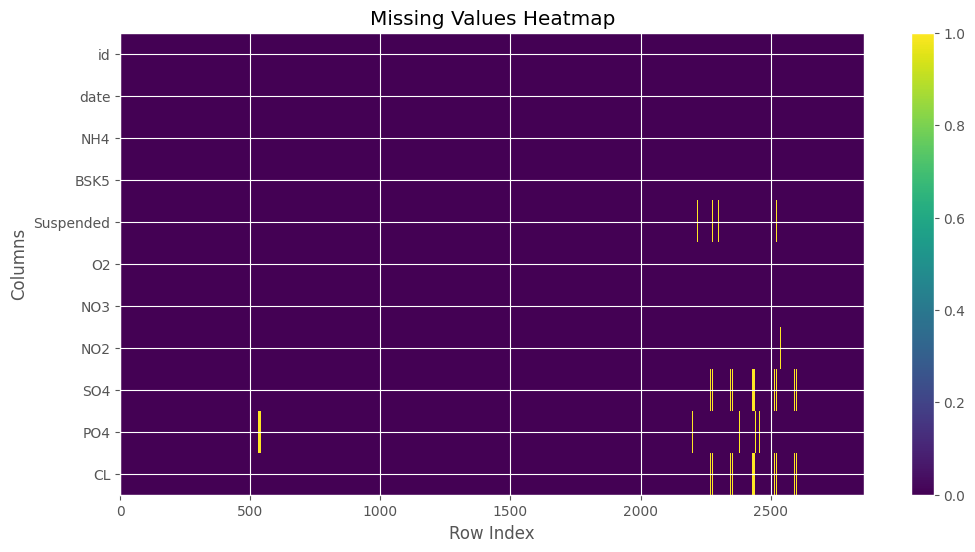

In [22]:
# Missing values visualization
plt.figure(figsize=(12, 6))
plt.imshow(df.isnull().T, aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Missing Values Heatmap')
plt.xlabel('Row Index')
plt.ylabel('Columns')
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

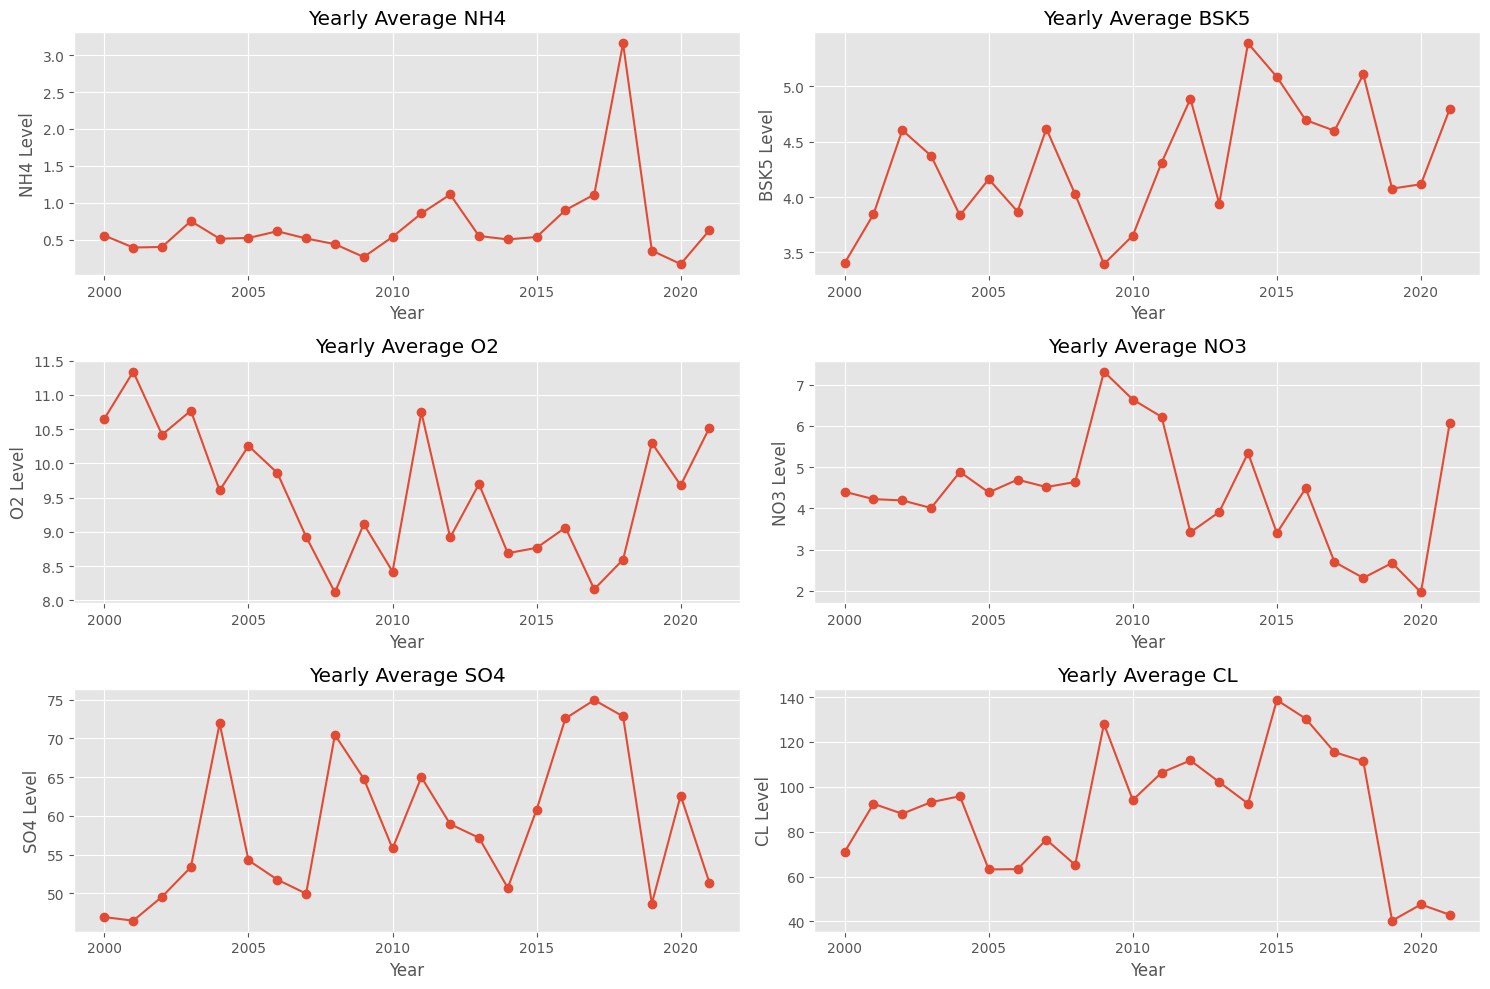

In [23]:
# Yearly trends for key parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, param in enumerate(params):
    ax = axes[i//2, i%2]
    yearly_avg = df_clean.groupby('year')[param].mean()
    ax.plot(yearly_avg.index, yearly_avg.values, marker='o')
    ax.set_title(f'Yearly Average {param}')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{param} Level')
    ax.grid(True)
plt.tight_layout()
plt.show()

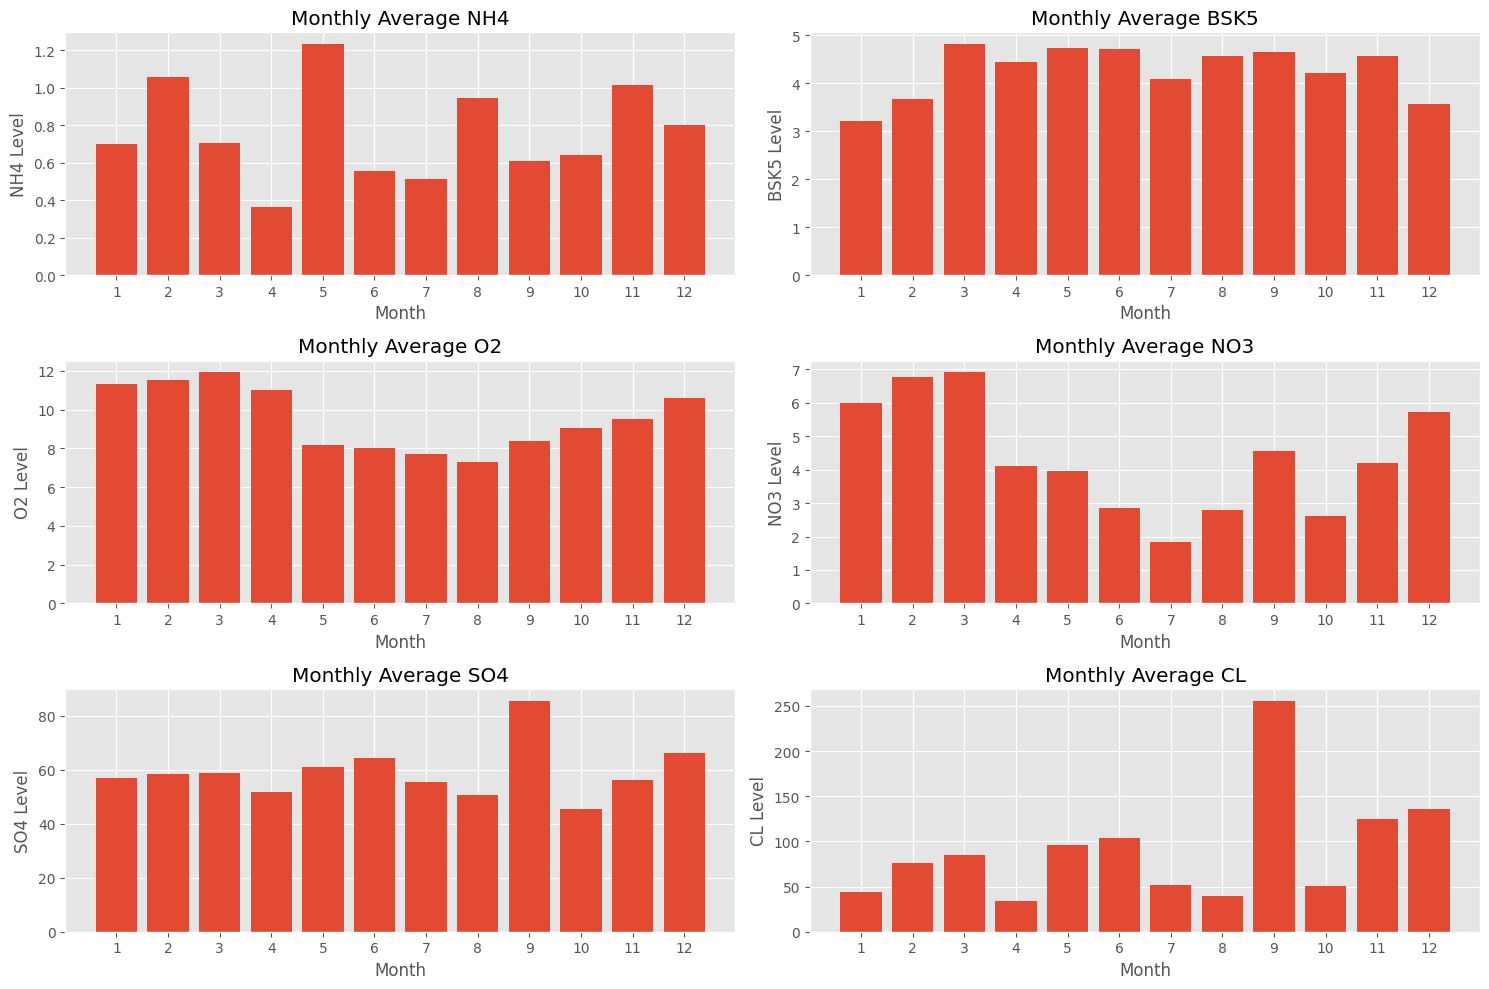

In [24]:
# Monthly patterns visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, param in enumerate(params):
    ax = axes[i//2, i%2]
    monthly_avg = df_clean.groupby('month')[param].mean()
    ax.bar(monthly_avg.index, monthly_avg.values)
    ax.set_title(f'Monthly Average {param}')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'{param} Level')
    ax.set_xticks(range(1, 13))
    ax.grid(True)
plt.tight_layout()
plt.show()

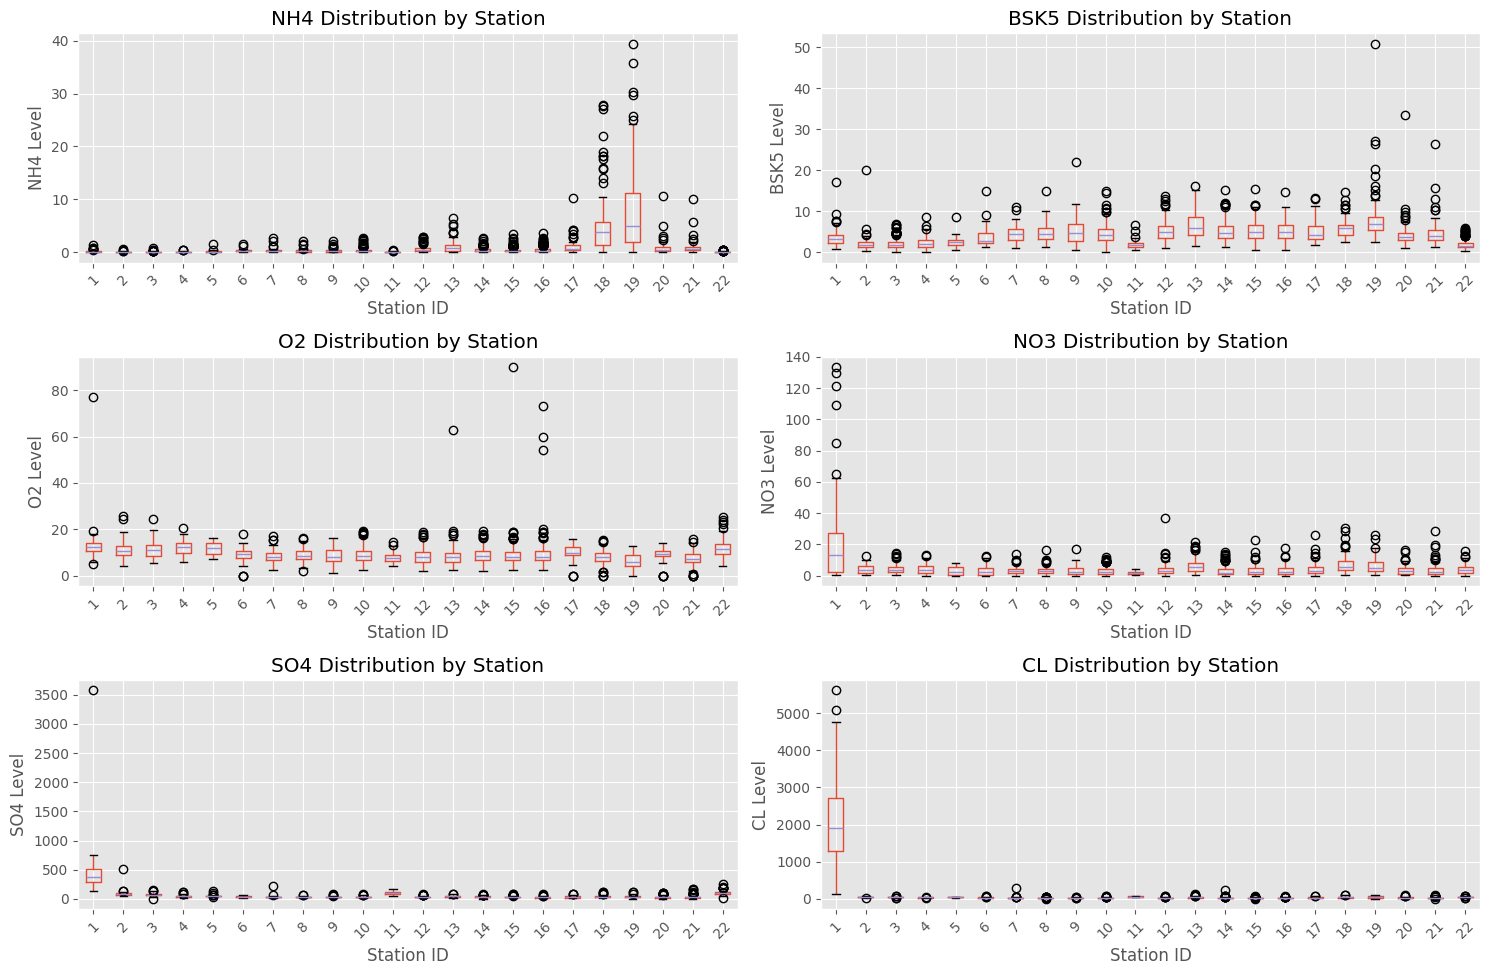

In [25]:
# Distribution across monitoring stations
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, param in enumerate(params):
    ax = axes[i//2, i%2]
    df_clean.boxplot(column=param, by='id', ax=ax)
    ax.set_title(f'{param} Distribution by Station')
    ax.set_xlabel('Station ID')
    ax.set_ylabel(f'{param} Level')
    ax.tick_params(axis='x', rotation=45)
plt.suptitle('')
plt.tight_layout()
plt.show()

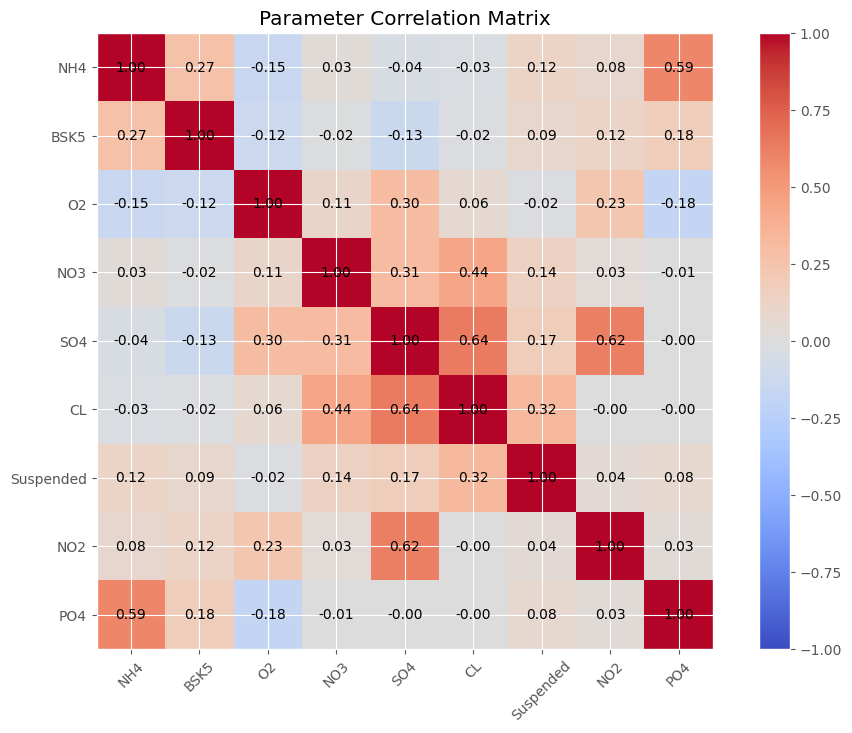

In [26]:
# Correlation matrix
corr_matrix = df_clean[params + ['Suspended', 'NO2', 'PO4']].corr()

plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Parameter Correlation Matrix')

# Add correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black')
plt.show()

In [27]:
# Create rolling averages
window_size = 3  # 3-month rolling average
for param in params:
    df_clean[f'{param}_rolling_avg'] = df_clean.groupby('id')[param].transform(
        lambda x: x.rolling(window_size, min_periods=1).mean()
    )

# Create year-over-year change features
for param in params:
    df_clean[f'{param}_yoy_change'] = df_clean.groupby(['id', 'month'])[param].transform(
        lambda x: x.pct_change(periods=1)  # Compare to same month in previous year
    )

# Create seasonality flags
df_clean['season'] = df_clean['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
             'Spring' if x in [3, 4, 5] else
             'Summer' if x in [6, 7, 8] else 'Autumn'
)

In [29]:
# Save cleaned and enriched data
df_clean.to_csv('water_quality_cleaned_enriched.csv', index=False)